## Seasonal decomposition - a study of a universal algorithm
Time windows decomposition aims to extract three main componets of the real-time data:
- trend
- seasonal
- residual

**Trend** <br \>
Trend component can be thought as the innate underlying pattern - somewhat similar to the behaviour of stock prices. As they usually go up or down in the same manner.<br \>
**Seasonal**<br \>
Is the actual measure of periodic trends. It can be thought as the periodicity of data, as it marks the recurring trends.<br \>
**Residual**<br \>
Residual data is simply a leftover, noise or anomaly data that could not be fit into the upper two categories.

### Identifying the general compiste model
We can roughly guess that our models can behave in two distinct ways. <br \>
Each of these "ways" can be modelled by a different mathematical description - either we end up with *additive* or *multiplicative* model. 

Anticipating the resulting model we can write:<br \>
**Additive model** 
$$y(t) = offset + Trend + Seasonal + Noise = Trend + Seasonal + Residual$$
**Multiplicative model**
$$y(t) = offset \times Trend \times Seasonal \times Noise = Trend \times Seasonal \times Residual$$

However, at this point above models are of little of use for extracting seperate componets from the real dataset.
Therefore, we need an algorithm to decompose each of these models sepearately into constituents.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

writer =pd.ExcelWriter('AMZN.xlsx')
df = pd.read_csv("AMZN_data.csv")
df.head()
df.to_excel(writer, 'Sheet1')

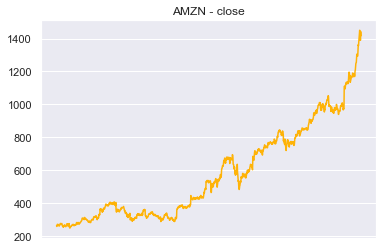

In [2]:
col = 'close'
plt.plot(df[col], color=sns.xkcd_rgb['amber'])
plt.title("AMZN - {}".format(col))
plt.xticks([])
plt.savefig("Amzn")

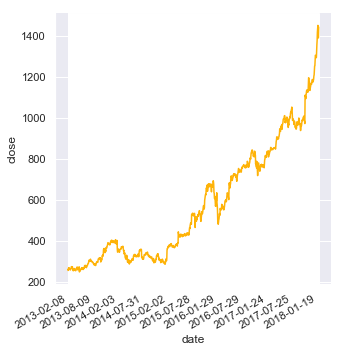

In [3]:
gplot = sns.relplot(x='date', y='close', legend ='brief', kind='line', data=df.sample(1000), color=sns.xkcd_rgb['amber'])
gplot.fig.autofmt_xdate()
# plt.title("AMZN stock price")
for ind, label in enumerate(gplot.ax.get_xticklabels()):
    vis = False
    if ind%99== 0:
        vis = True
    label.set_visible(vis)

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose 
result = seasonal_decompose(df[col], model='additive', freq=365)

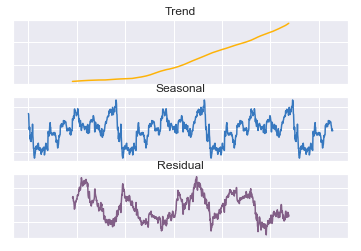

In [5]:
fig = plt.figure()
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)

ax1.set_title("Trend")
ax2.set_title("Seasonal")
ax3.set_title("Residual")
ax2.get_shared_x_axes().join(ax2, ax3)
ax1.get_shared_x_axes().join(ax1, ax2)
for ax in [ax1, ax2, ax3]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

sns.lineplot(data=result.trend, ax=ax1, color=sns.xkcd_rgb['amber'])
sns.lineplot(data=result.seasonal, ax=ax2, color=sns.xkcd_rgb['windows blue'])
sns.lineplot(data=result.resid, ax=ax3, color=sns.xkcd_rgb['dusty purple'])
plt.savefig("Dec.png")
plt.show()

In [6]:
decomposed_df = pd.DataFrame({'trend': result.trend, 
                              'seasonal': result.seasonal, 
                              'residual': result.resid})
decomposed_df.to_excel(writer, "Sheet 2")

In [7]:
for col, col_hue in zip(['trend', 'seasonal', 'residual'], ['amber', 'windows blue', 'dusty purple']):
    plt.plot(decomposed_df[col], color=sns.xkcd_rgb[col_hue])
    plt.title("{}".format(col))
    plt.savefig("Dec"+col+".png")
    plt.clf()

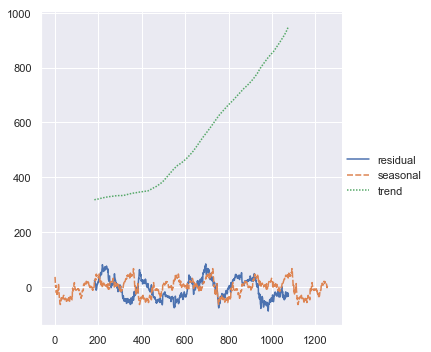

In [8]:
gplot = sns.relplot(hue=['trend', 'seasonal', 'residual'], 
                    legend ='brief', kind='line', data=decomposed_df)

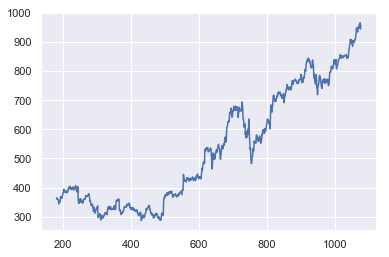

In [19]:
plt.plot(decomposed_df['trend']+decomposed_df['seasonal']
         +decomposed_df['residual'])

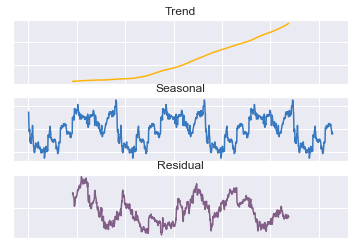

In [15]:
col = 'close'
result2 = seasonal_decompose(df[col], model='multiplicative', freq=365)
fig = plt.figure()
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)

ax1.set_title("Trend")
ax2.set_title("Seasonal")
ax3.set_title("Residual")
ax2.get_shared_x_axes().join(ax2, ax3)
ax1.get_shared_x_axes().join(ax1, ax2)
for ax in [ax1, ax2, ax3]:
    ax.set_xticklabels([])
    ax.set_yticklabels([])

sns.lineplot(data=result2.trend, ax=ax1, color=sns.xkcd_rgb['amber'])
sns.lineplot(data=result2.seasonal, ax=ax2, color=sns.xkcd_rgb['windows blue'])
sns.lineplot(data=result2.resid, ax=ax3, color=sns.xkcd_rgb['dusty purple'])
decomposed_df2 = pd.DataFrame({'trend': result2.trend, 
                               'seasonal': result2.seasonal, 
                               'residual': result2.resid})


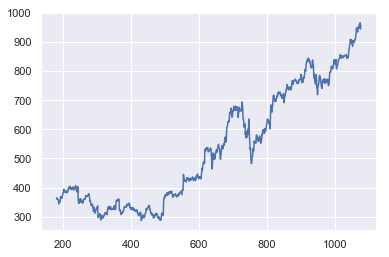

In [18]:
plt.plot(decomposed_df2['trend']*decomposed_df2['seasonal']
         *decomposed_df2['residual'])

Text(0.5,1,'Critical value in function of degrees of freedom')

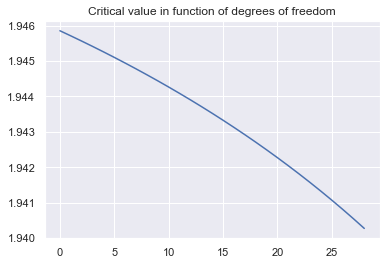

In [20]:
import numpy as np
from scipy import stats

def calcualte_crit(nmk, tp=0.025):
    tval = stats.t.ppf(1-tp,nmk-1)
    return (nmk)*tval/np.sqrt((nmk-1+tval**2)*(nmk+1))
n = 100
k = 30
datapoints = []
x_points = []
for i in range(1, k):
    x_points.append(i-1)
    datapoints.append(calcualte_crit(n-i))
    
plt.plot(x_points, datapoints)
plt.title("Critical value in function of degrees of freedom")

Used dataset https://www.kaggle.com/camnugent/sandp500/version/4#